In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

#city_data.head()
#ride_data.head()
# Combine the data into a single dataset
city_ride_df = pd.merge(ride_data, city_data, on="city")
# Display the data table for preview

city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [3]:
#set up 3 city variables for each city type (urban,suburban,rural)
urban_cities = city_ride_df[city_ride_df["type"]=="Urban"]
suburban_cities = city_ride_df[city_ride_df["type"]=="Suburban"]
rural_cities = city_ride_df[city_ride_df["type"]=="Rural"]

#calculate averages and totals using variables above using groupby
#urban cities
avg_fare_urban = urban_cities.groupby(["city"]).mean()["fare"]
total_rides_urban = urban_cities.groupby(["city"]).count()["ride_id"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

#suburban cities
avg_fare_suburban = suburban_cities.groupby(["city"]).mean()["fare"]
total_rides_suburban = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

#rural cities
avg_fare_rural = rural_cities.groupby(["city"]).mean()["fare"]
total_rides_rural = rural_cities.groupby(["city"]).count()["ride_id"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

## Bubble Plot of Ride Sharing Data

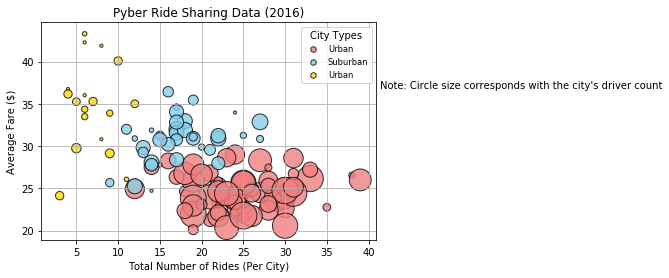

In [19]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types
plt.scatter(total_rides_urban, avg_fare_urban, marker="o", facecolors="lightcoral", edgecolors="black",
             s=urban_driver_count*10, alpha=0.8, label="Urban")
plt.scatter(total_rides_suburban, avg_fare_suburban, marker="o", facecolors="skyblue", edgecolors="black",
             s=suburban_driver_count*10, alpha=0.8, label="Suburban")
plt.scatter(total_rides_rural, avg_fare_rural, marker="o", facecolors="gold", edgecolors="black",
             s=rural_driver_count*10, alpha=0.8, label="Urban")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)

# Incorporate a text label regarding circle size
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.text(.91, 0.65, "Note: Circle size corresponds with the city's driver count", fontsize=10, transform=plt.gcf().transFigure)

# Save Figure
plt.show()

## Total Fares by City Type

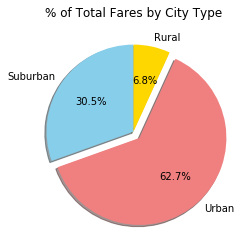

In [27]:
# Calculate totals
urban_fare_total = urban_cities["fare"].sum()
suburban_fare_total = suburban_cities["fare"].sum()
rural_fare_total = rural_cities["fare"].sum()
# Build Pie Chart
labels = ["Suburban", "Urban", "Rural"]
sizes = [suburban_fare_total, urban_fare_total, rural_fare_total]
colors = ["skyblue", "lightcoral", "gold"]
explode = (0,0.1,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.show()

## Total Rides by City Type

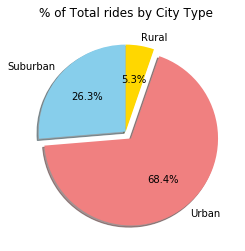

In [29]:
# Calculate Ride Percents by using counts of unique rider ID to get total rides
total_urban = urban_cities["ride_id"].count()
total_suburban = suburban_cities["ride_id"].count()
total_rural = rural_cities["ride_id"].count()
# Build Pie Chart
labels = ["Suburban", "Urban", "Rural"]
sizes = [total_suburban, total_urban, total_rural]
colors = ["skyblue", "lightcoral", "gold"]
explode = (0,0.1,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.show()

## Total Drivers by City Type

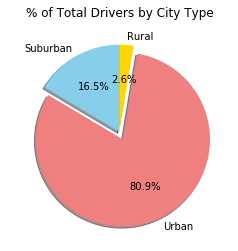

In [39]:
# use driver counts defined for scatter plot and sum them
pie_driver_urban = urban_driver_count.sum()
pie_driver_suburban = suburban_driver_count.sum()
pie_driver_rural = rural_driver_count.sum()
# Build Pie Charts
labels = ["Suburban", "Urban", "Rural"]
sizes = [pie_driver_suburban, pie_driver_urban, pie_driver_rural]
colors = ["skyblue", "lightcoral", "gold"]
explode = (0,0.1,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Drivers by City Type")
# Save Figure

plt.show()